In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("data/WATCHLIST.csv")

In [5]:
n_movies = len(df)
print(n_movies)

800


In [6]:
df.head()

,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Your Rating,Date Rated
0,1,tt0111161,2012-07-05,2012-07-05,NaN,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,movie,9.3,142,1994,Drama,2759556,1994-09-10,Frank Darabont,10,2012-07-05
1,2,tt0068646,2012-07-05,2012-07-05,NaN,The Godfather,https://www.imdb.com/title/tt0068646/,movie,9.2,175,1972,"Crime, Drama",1920318,1972-03-14,Francis Ford Coppola,7,2012-09-15
2,3,tt0468569,2012-07-05,2012-07-05,NaN,The Dark Knight,https://www.imdb.com/title/tt0468569/,movie,9.0,152,2008,"Action, Crime, Drama, Thriller",2732541,2008-07-14,Christopher Nolan,8,2012-07-19
3,4,tt0137523,2012-07-05,2012-07-05,NaN,Fight Club,https://www.imdb.com/title/tt0137523/,movie,8.8,139,1999,Drama,2197181,1999-09-10,David Fincher,9,2012-07-05
4,5,tt1375666,2012-07-05,2012-07-05,NaN,Inception,https://www.imdb.com/title/tt1375666/,movie,8.8,148,2010,"Action, Adventure, Sci-Fi, Thriller",2424924,2010-07-08,Christopher Nolan,9,2012-07-05


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Position        800 non-null    int64  
 1   Const           800 non-null    object 
 2   Created         800 non-null    object 
 3   Modified        800 non-null    object 
 4   Description     0 non-null      float64
 5   Title           800 non-null    object 
 6   URL             800 non-null    object 
 7   Title Type      800 non-null    object 
 8   IMDb Rating     800 non-null    float64
 9   Runtime (mins)  800 non-null    int64  
 10  Year            800 non-null    int64  
 11  Genres          799 non-null    object 
 12  Num Votes       800 non-null    int64  
 13  Release Date    800 non-null    object 
 14  Directors       793 non-null    object 
 15  Your Rating     800 non-null    int64  
 16  Date Rated      800 non-null    object 
dtypes: float64(2), int64(5), object(10)

In [8]:
df.describe()

,Position,Description,IMDb Rating,Runtime (mins),Year,Num Votes,Your Rating
count,800.000000,0.0,800.000000,800.000000,800.000000,8.000000e+02,800.000000
mean,398.667500,NaN,7.488625,116.391250,2005.353750,3.330094e+05,7.630000
std,230.822731,NaN,0.756355,31.858231,15.698381,4.014476e+05,1.315395
min,1.000000,NaN,1.700000,12.000000,1933.000000,1.500000e+01,1.000000
25%,198.750000,NaN,7.100000,99.000000,2002.000000,6.247925e+04,7.000000
50%,398.500000,NaN,7.600000,113.000000,2010.000000,1.834225e+05,8.000000
75%,598.250000,NaN,8.000000,130.000000,2015.250000,4.664140e+05,8.000000
max,798.000000,NaN,9.300000,557.000000,2023.000000,2.759556e+06,10.000000


In [9]:
len(df.Directors.unique())

540

In [10]:
len(df.Year.unique())

76

In [11]:
sum(df["Runtime (mins)"]) / 60

1551.8833333333334

In [12]:
sum(df["Runtime (mins)"]) / n_movies

116.39125

In [13]:
np.mean(df["IMDb Rating"])

7.488624999999998

In [14]:
np.std(df["IMDb Rating"])

0.7558823383139734

In [15]:
np.mean(df["Your Rating"])

7.63

In [16]:
np.std(df["Your Rating"])

1.31457217375083

In [17]:
df.Directors.value_counts()[:20]

Christopher Nolan        9
Steven Spielberg         9
David Fincher            8
Makoto Shinkai           7
Alejandro G. Iñárritu    6
Quentin Tarantino        6
Martin Scorsese          6
Richard Linklater        6
Paul Thomas Anderson     6
Ethan Coen, Joel Coen    6
Wes Anderson             5
Stanley Kubrick          5
Rob Marshall             5
Danny Boyle              5
Alfred Hitchcock         5
Denis Villeneuve         5
Darren Aronofsky         5
Gore Verbinski           4
Alfonso Cuarón           4
David Yates              4
Name: Directors, dtype: int64

In [19]:
director_scores = pd.DataFrame(df.groupby('Directors').agg({'Directors':'size', 'Your Rating':'mean'}).rename(columns={'Directors':'Number of movies watched','Your Rating':'Your Average Rating'})).sort_values(['Your Average Rating'], ascending=False)
director_scores.head(20)

,Number of movies watched,Your Average Rating
Directors,,
"Mervyn LeRoy, King Vidor, Norman Taurog, George Cukor, Richard Thorpe, Victor Fleming",1,10.0
"Lisanne Pajot, James Swirsky",1,10.0
"Lilly Wachowski, Lana Wachowski",1,10.0
Yasujirô Ozu,1,10.0
John Patrick Shanley,1,10.0
"Christopher Miller, Phil Lord",1,10.0
"Olivier Nakache, Éric Toledano",1,10.0
Charlie Kaufman,2,9.5
"Chris Sanders, Dean DeBlois",1,9.0


In [20]:
pd.DataFrame(df.groupby(['Directors']).size())

,0
Directors,
"Aamir Khan, Amole Gupte",1
Abbas Kiarostami,1
Abdullah Mohammed Saad,1
Adam Elliot,1
Adam McKay,1
...,...
Zach Braff,1
Zack Snyder,1
Zaza Urushadze,1


https://www.analyticsvidhya.com/blog/2022/03/exploratory-data-analysis-with-an-example/

# Your Rating

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
sns.set(rc={'figure.figsize':(15,7)})

In [26]:
my_average_rating = np.mean(df['Your Rating'])
my_average_rating

7.63

In [28]:
df['Release Year'] = df['Release Date'].str.split('-').str[0]
df['Above average'] = df['Your Rating'].map(lambda rating: 'Yes' if rating > my_average_rating else 'No')

In [30]:
df.head()

,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Your Rating,Date Rated,Release Year,Above average
0,1,tt0111161,2012-07-05,2012-07-05,NaN,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,movie,9.3,142,1994,Drama,2759556,1994-09-10,Frank Darabont,10,2012-07-05,1994,Yes
1,2,tt0068646,2012-07-05,2012-07-05,NaN,The Godfather,https://www.imdb.com/title/tt0068646/,movie,9.2,175,1972,"Crime, Drama",1920318,1972-03-14,Francis Ford Coppola,7,2012-09-15,1972,No
2,3,tt0468569,2012-07-05,2012-07-05,NaN,The Dark Knight,https://www.imdb.com/title/tt0468569/,movie,9.0,152,2008,"Action, Crime, Drama, Thriller",2732541,2008-07-14,Christopher Nolan,8,2012-07-19,2008,Yes
3,4,tt0137523,2012-07-05,2012-07-05,NaN,Fight Club,https://www.imdb.com/title/tt0137523/,movie,8.8,139,1999,Drama,2197181,1999-09-10,David Fincher,9,2012-07-05,1999,Yes
4,5,tt1375666,2012-07-05,2012-07-05,NaN,Inception,https://www.imdb.com/title/tt1375666/,movie,8.8,148,2010,"Action, Adventure, Sci-Fi, Thriller",2424924,2010-07-08,Christopher Nolan,9,2012-07-05,2010,Yes


In [181]:
df['Your Rating'].unique()

array([10,  7,  8,  9,  5,  6,  2,  3,  4,  1])

In [197]:
sum([0.0025, 0.00125, 0.00875, 0.01875, 0.035, 0.08875, 0, 0, 0, 0.0225]
)

0.1775

In [212]:
ratings_frequencies

Your Rating
1     0.0250
2     0.0125
3     0.0875
4     0.1875
5     0.3500
6     0.8875
7     2.0375
8     4.0375
9     2.1500
10    0.2250
Name: Your Rating, dtype: float64

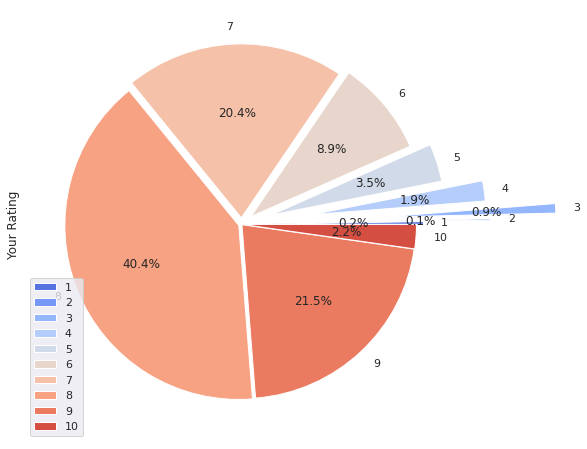

In [270]:
ratings_frequencies = df.groupby(['Your Rating'])['Your Rating'].count().map(lambda x: x / len(df))
explode = [1 if r < 0.005 else 0 for r in ratings_frequencies.values]

ratings_frequencies.plot.pie(y="Your Rating", figsize=(8, 8), explode=2*ratings_frequencies.values[::-1], autopct='%1.1f%%', colors=sns.color_palette("coolwarm", 10), startangle=0)
plt.legend(sorted(df['Your Rating'].unique()), loc="lower left")

**⚠ WARNING** When testing Viz, better try to visualize on just a subset of data

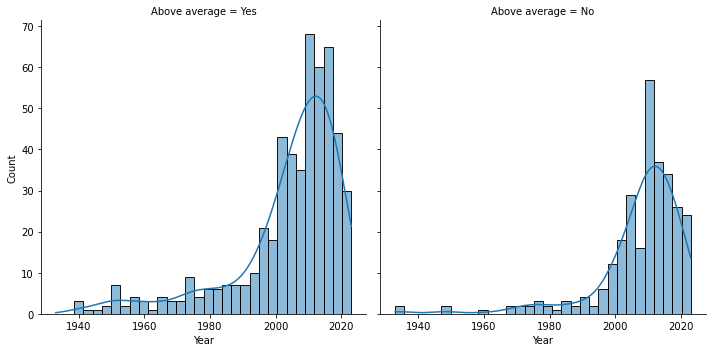

In [43]:
# sns.set_theme(style="darkgrid")
sns.displot(data=df, x="Year", col="Above average", kde=True)

<AxesSubplot:xlabel='Year', ylabel='Count'>

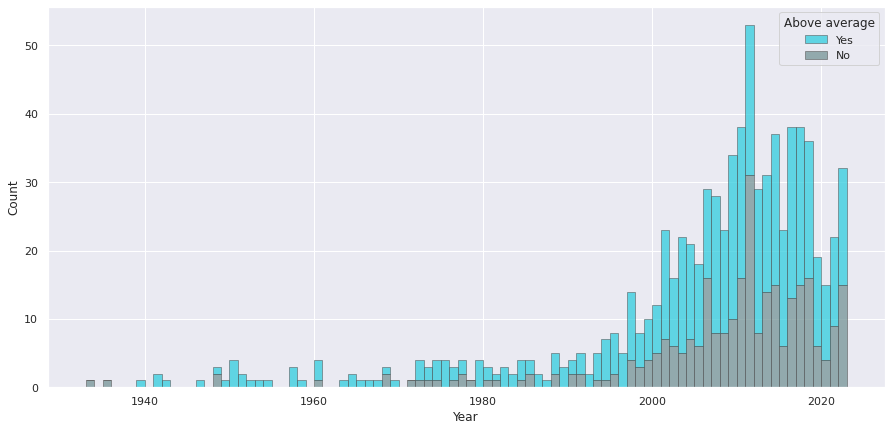

In [264]:
sns.histplot(
    df,
    x="Year", hue="Above average",
    stat="count",
    multiple="stack",
    binwidth=1,
    palette={"Yes": "#31cdde", "No": "#759396"},
    edgecolor=".3",
    linewidth=.5,
)

<AxesSubplot:xlabel='Year', ylabel='Percent'>

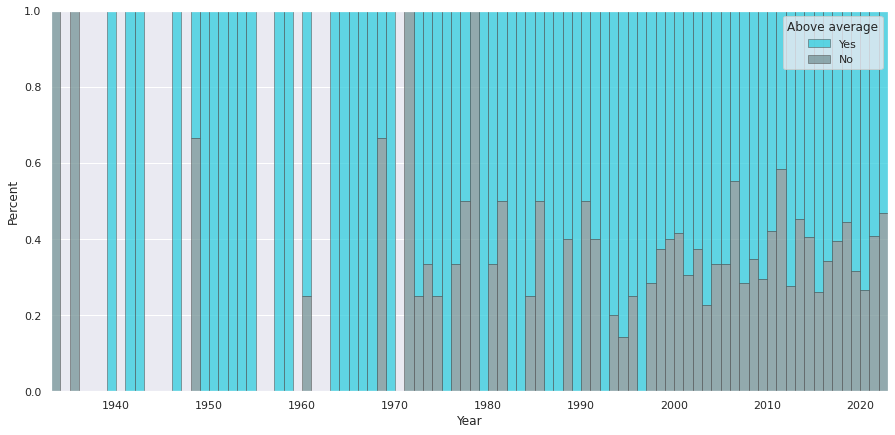

In [265]:
sns.histplot(
    df,
    x="Year", hue="Above average",
    multiple="fill",
    stat="percent",
    binwidth=1,
    palette={"Yes": "#31cdde", "No": "#759396"},
    edgecolor=".3",
    linewidth=.5,
)

In [266]:
years_frequencies = df.groupby(["Year"])['Year'].count()
years_frequencies

Year
1933     1
1935     1
1939     1
1941     2
1942     1
        ..
2019    19
2020    15
2021    22
2022    26
2023     6
Name: Year, Length: 76, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='Year'>

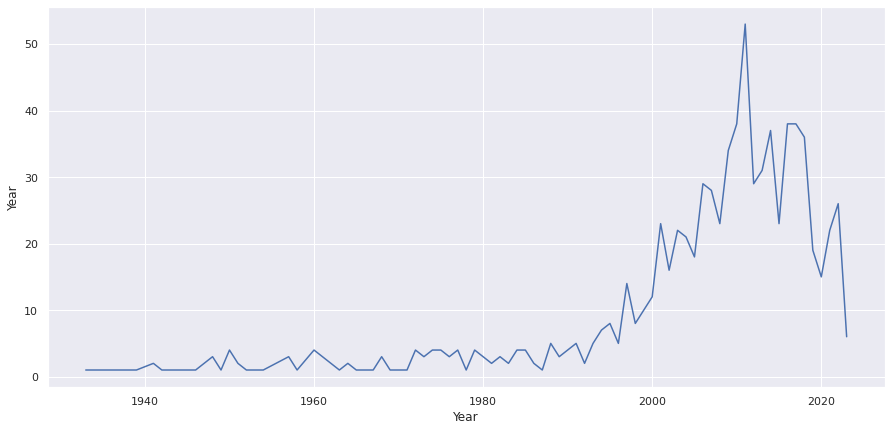

In [267]:
sns.lineplot(data=years_frequencies)

In [268]:
years_frequencies.sum()

800

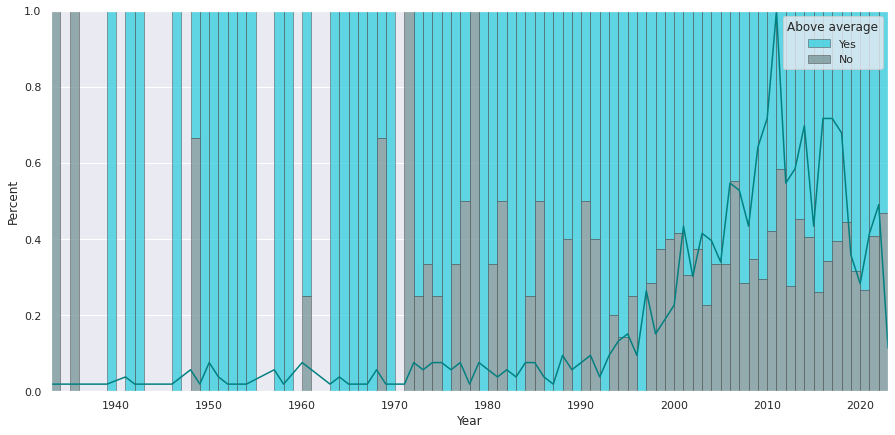

In [269]:
years_frequencies = df.groupby(["Year"])['Year'].count() / len(df)

z = sns.histplot(
    df,
    x="Year", hue="Above average",
    multiple="fill",
    stat="percent",
    binwidth=1,
    # kde=True,
    palette={"Yes": "#31cdde", "No": "#759396"},
    edgecolor=".3",
    linewidth=.5,
)
z = sns.lineplot(data=years_frequencies / max(years_frequencies), color='teal')

In [96]:
hue_order = df['Your Rating'].unique()
hue_order = sorted(hue_order)
hue_order

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [92]:
df['Your Rating (cat)'] = pd.Categorical(df['Your Rating'])

In [93]:
df['Your Rating (cat)']

0      10
1       7
2       8
3       9
4       9
       ..
795     9
796     7
797     8
798     4
799     9
Name: Your Rating (cat), Length: 800, dtype: category
Categories (10, int64): [1, 2, 3, 4, ..., 7, 8, 9, 10]

In [99]:
hue_order = df.groupby('Year')['Your Rating'].count().sort_values().index

In [111]:
possible_ratings = list(range(10, 0, -1))
colors = sns.color_palette("coolwarm_r", n_colors=len(possible_ratings))
palette = {r: c for r, c in zip(possible_ratings, colors)}

In [120]:
palette[10] = (1, 1, 0)

In [121]:
palette

{10: (1, 1, 0),
 9: (0.9182816725843137, 0.48417347218039214, 0.37779392507058823),
 8: (0.963806056435294, 0.6341884145294118, 0.5137208491529413),
 7: (0.9616447383764706, 0.7580291825411765, 0.6617823791647058),
 6: (0.9094595977529412, 0.8393864797647058, 0.8003313524235294),
 5: (0.8180564934117647, 0.8555896775450981, 0.9146376165490196),
 4: (0.7087196897176471, 0.8057213889294117, 0.9811168090470588),
 3: (0.5814861481882353, 0.7134505955294117, 0.9983143529411764),
 2: (0.4570464785254902, 0.5940055499294118, 0.963029229690196),
 1: (0.3383765114431373, 0.45281860883137254, 0.8793170768784313)}

<AxesSubplot:xlabel='Year', ylabel='Count'>

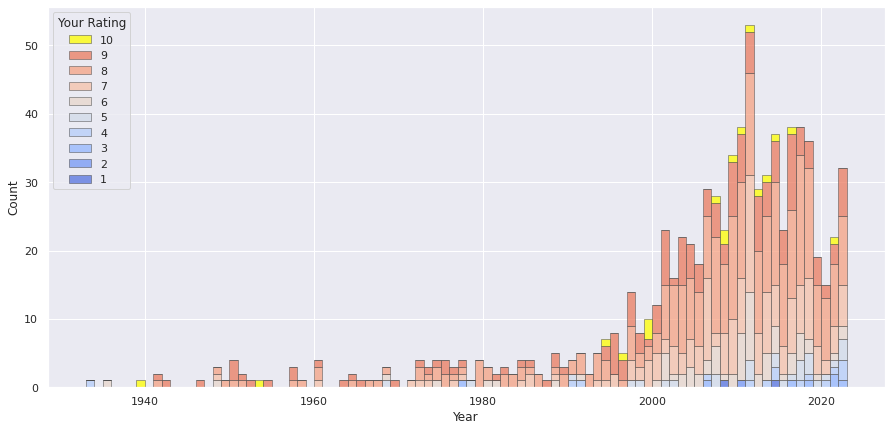

In [122]:
sns.histplot(
    df,
    x="Year", hue="Your Rating",
    multiple="stack",
    hue_order=possible_ratings,
    binwidth=1,
    palette=palette,
    edgecolor=".3",
    linewidth=.5,
)

## per decade

In [123]:
df.Year.min(), df.Year.max()

(1933, 2023)

In [126]:
years_bins = range(1933, 2024, 10)
list(years_bins)

[1933, 1943, 1953, 1963, 1973, 1983, 1993, 2003, 2013, 2023]

<AxesSubplot:xlabel='Year', ylabel='Count'>

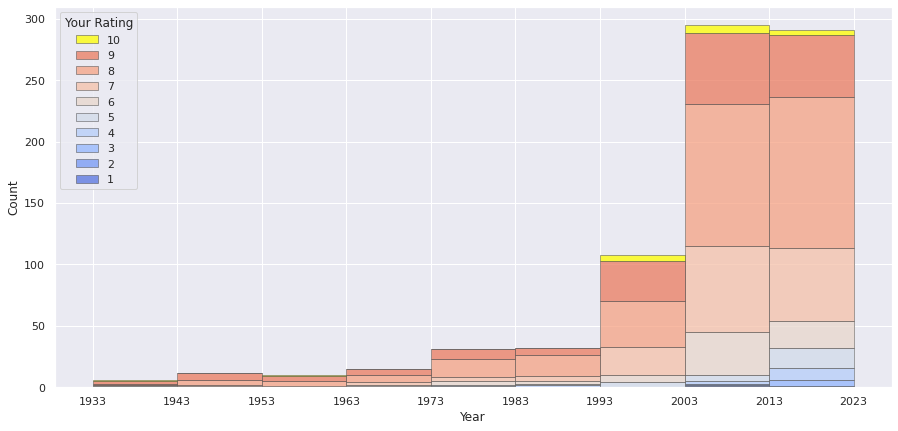

In [129]:
plt.xticks(years_bins)
sns.histplot(
    df,
    x="Year", hue="Your Rating",
    multiple="stack",
    hue_order=possible_ratings,
    bins=years_bins,
    palette=palette,
    edgecolor=".3",
    linewidth=.5,
)

<AxesSubplot:xlabel='Year', ylabel='Count'>

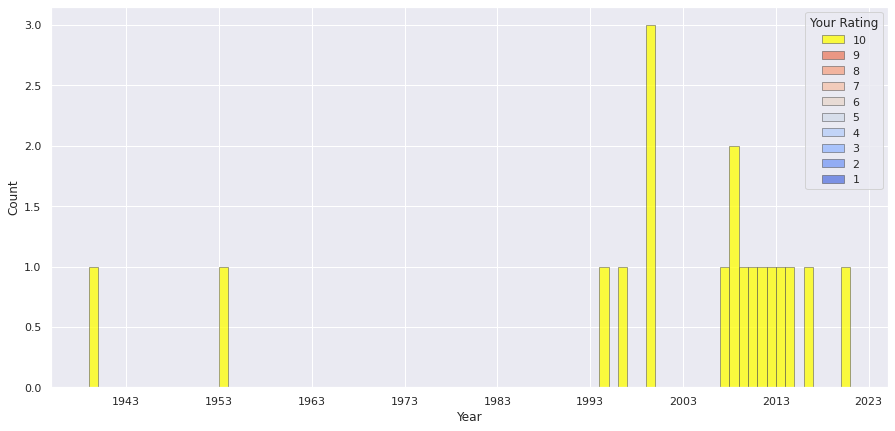

In [134]:
plt.xticks(years_bins)
sns.histplot(
    df[df["Your Rating"] == 10],
    x="Year", hue="Your Rating",
    multiple="stack",
    hue_order=possible_ratings,
    binwidth=1,
    palette=palette,
    edgecolor=".3",
    linewidth=.5,
)


<AxesSubplot:xlabel='Year', ylabel='Count'>

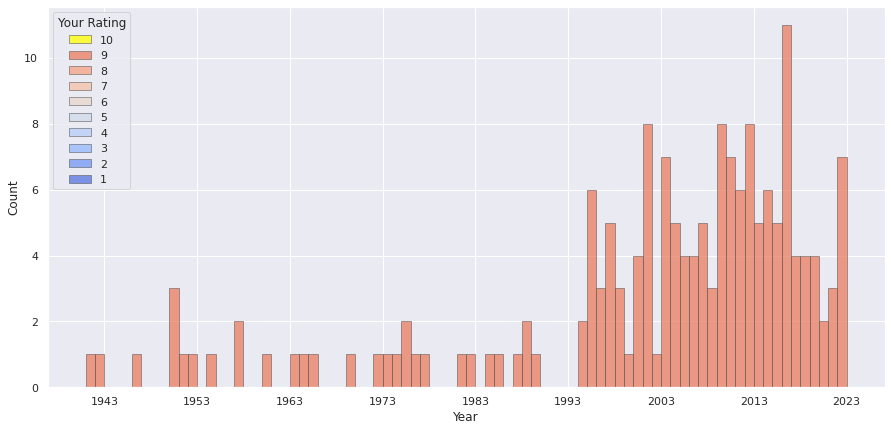

In [135]:
plt.xticks(years_bins)
sns.histplot(
    df[df["Your Rating"] == 9],
    x="Year", hue="Your Rating",
    multiple="stack",
    hue_order=possible_ratings,
    binwidth=1,
    palette=palette,
    edgecolor=".3",
    linewidth=.5,
)


# Genres

In [275]:
df[['Genres']].head(10)

,Genres
0,Drama
1,"Crime, Drama"
2,"Action, Crime, Drama, Thriller"
3,Drama
4,"Action, Adventure, Sci-Fi, Thriller"
5,"Action, Sci-Fi"
6,"Crime, Drama, Mystery, Thriller"
7,"Crime, Drama, Thriller"
8,"Crime, Drama, Mystery, Thriller"
9,"Action, Sci-Fi"


In [281]:
from collections import Counter

all_genres = [g for gs in df['Genres'].values for g in str(gs).split(', ')]
genre_frequencies = Counter(all_genres)

In [321]:
dict(genre_frequencies)

{'Drama': 568,
 'Crime': 132,
 'Action': 131,
 'Thriller': 199,
 'Adventure': 148,
 'Sci-Fi': 127,
 'Mystery': 131,
 'Animation': 95,
 'Family': 88,
 'Fantasy': 125,
 'Comedy': 238,
 'Romance': 174,
 'Biography': 62,
 'History': 24,
 'Western': 8,
 'Music': 28,
 'Musical': 25,
 'Sport': 5,
 'War': 25,
 'Horror': 35,
 'Short': 4,
 'Documentary': 21,
 'Film-Noir': 3,
 'nan': 1,
 'News': 1}

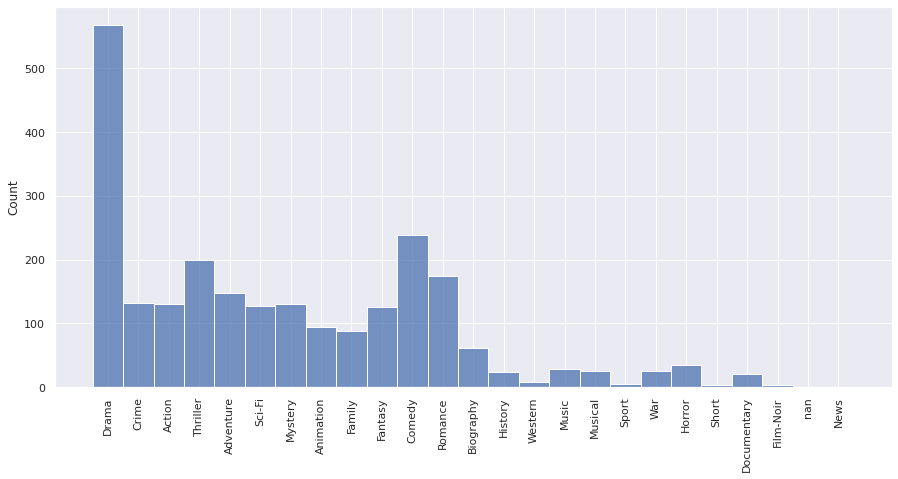

In [327]:
sns.histplot(all_genres)
_ = plt.xticks(rotation=90)

In [330]:
multi_genre_list = [g for g in df['Genres'].values if ', ' in str(g)]
multi_genre_list

['Crime, Drama',
 'Action, Crime, Drama, Thriller',
 'Action, Adventure, Sci-Fi, Thriller',
 'Action, Sci-Fi',
 'Crime, Drama, Mystery, Thriller',
 'Crime, Drama, Thriller',
 'Crime, Drama, Mystery, Thriller',
 'Action, Sci-Fi',
 'Mystery, Thriller',
 'Animation, Adventure, Family, Fantasy, Mystery',
 'Adventure, Comedy, Sci-Fi',
 'Drama, Romance, Sci-Fi',
 'Drama, Mystery, Sci-Fi, Thriller',
 'Action, Adventure, Drama',
 'Drama, Mystery, Thriller',
 'Animation, Action, Adventure, Fantasy',
 'Animation, Adventure, Comedy, Drama, Family',
 'Comedy, Drama, Romance',
 'Biography, Drama, History',
 'Drama, Thriller',
 'Drama, Mystery, Sci-Fi, Thriller',
 'Animation, Action, Adventure, Comedy, Family, Fantasy',
 'Action, Drama, Sci-Fi, Thriller',
 'Animation, Adventure, Comedy, Family',
 'Drama, Romance',
 'Crime, Drama, Mystery, Thriller',
 'Comedy, Drama, Romance',
 'Animation, Adventure, Drama, Family, Fantasy',
 'Animation, Adventure, Comedy, Family',
 'Comedy, Drama',
 'Animation, Adve

In [332]:
multi_genre_counter = Counter(multi_genre_list)
multi_genre_counter.most_common()

[('Comedy, Drama', 47),
 ('Drama, Romance', 42),
 ('Comedy, Drama, Romance', 30),
 ('Crime, Drama, Thriller', 20),
 ('Crime, Drama, Mystery, Thriller', 18),
 ('Drama, Thriller', 18),
 ('Crime, Drama', 14),
 ('Biography, Drama', 12),
 ('Comedy, Romance', 11),
 ('Drama, Mystery, Thriller', 10),
 ('Animation, Adventure, Comedy, Family, Fantasy', 8),
 ('Action, Adventure, Sci-Fi', 8),
 ('Drama, Music', 8),
 ('Action, Drama, Sci-Fi, Thriller', 7),
 ('Mystery, Thriller', 6),
 ('Adventure, Family, Fantasy, Mystery', 6),
 ('Biography, Drama, Romance', 6),
 ('Drama, Fantasy', 6),
 ('Biography, Crime, Drama', 6),
 ('Action, Crime, Drama, Thriller', 5),
 ('Action, Adventure, Sci-Fi, Thriller', 5),
 ('Action, Sci-Fi', 5),
 ('Drama, Sci-Fi, Thriller', 5),
 ('Drama, Sci-Fi', 5),
 ('Drama, Mystery', 5),
 ('Action, Adventure, Fantasy, Sci-Fi', 5),
 ('Horror, Mystery, Thriller', 5),
 ('Drama, Romance, Sci-Fi', 4),
 ('Drama, Mystery, Sci-Fi, Thriller', 4),
 ('Biography, Drama, History', 4),
 ('Animation

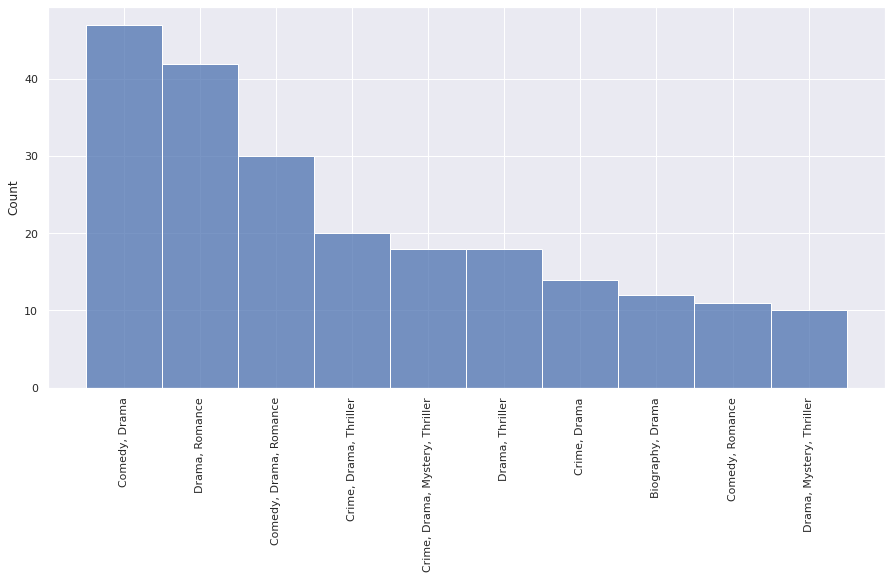

In [338]:
sns.histplot([g for gs in [[g]*c for g, c in multi_genre_counter.most_common(10)] for g in gs] )
_ = plt.xticks(rotation=90)

In [347]:
genre_connections = {}

for gs, c in Counter(multi_genre_list).most_common():
    g, *others = sorted(gs.split(', '))
    for o in others:
        if (g, o) not in genre_connections:
            genre_connections[(g, o)] = 0
        genre_connections[(g, o)] += c

In [348]:
genre_connections

{('Comedy', 'Drama'): 104,
 ('Drama', 'Romance'): 70,
 ('Comedy', 'Romance'): 54,
 ('Crime', 'Drama'): 70,
 ('Crime', 'Thriller'): 55,
 ('Crime', 'Mystery'): 28,
 ('Drama', 'Thriller'): 49,
 ('Biography', 'Drama'): 55,
 ('Drama', 'Mystery'): 38,
 ('Adventure', 'Animation'): 40,
 ('Adventure', 'Comedy'): 43,
 ('Adventure', 'Family'): 49,
 ('Adventure', 'Fantasy'): 43,
 ('Action', 'Adventure'): 73,
 ('Action', 'Sci-Fi'): 65,
 ('Drama', 'Music'): 13,
 ('Action', 'Drama'): 47,
 ('Action', 'Thriller'): 52,
 ('Mystery', 'Thriller'): 8,
 ('Adventure', 'Mystery'): 17,
 ('Biography', 'Romance'): 11,
 ('Drama', 'Fantasy'): 16,
 ('Biography', 'Crime'): 12,
 ('Action', 'Crime'): 20,
 ('Drama', 'Sci-Fi'): 30,
 ('Action', 'Fantasy'): 37,
 ('Horror', 'Mystery'): 8,
 ('Horror', 'Thriller'): 8,
 ('Biography', 'History'): 12,
 ('Drama', 'Family'): 5,
 ('Comedy', 'Fantasy'): 12,
 ('Comedy', 'Crime'): 13,
 ('Animation', 'Drama'): 25,
 ('Animation', 'Fantasy'): 12,
 ('Animation', 'Romance'): 13,
 ('Crime',

In [340]:
import networkx as nx

In [353]:
G = nx.Graph()

In [362]:
for nodes, weight in genre_connections.items():
    G.add_edge(nodes[0], nodes[1], weight=weight)

In [371]:
# pip install netgraph

     |████████████████████████████████| 96 kB 2.0 MB/s eta 0:00:011
     |████████████████████████████████| 41 kB 749 kB/s  eta 0:00:01
     |████████████████████████████████| 299 kB 5.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
node_degree = dict(G.degree(weight='weight'))

node_positions = nx.spring_layout(G)

node_positions[0] = (0.5, 0.5) # by default, networkx plots on a canvas with the origin at (0, 0) and a width and height of 1; (0.5, 0.5) is hence the center
nx.draw(G, pos=node_positions, node_size=[1 * node_degree[node] for node in G])

nx.draw_networkx_edge_labels(G,node_positions,edge_labels=labels)